# Ford GoBike Trip Service Analysis - February 2019
## by Stella Njeru

## Investigation Overview
The dataset I will be analyzing is from Ford GoBike System. It contains information on a bike sharing system in the San Francisco Bay area. My main focus will be on trip duration, busiest hours on different days, and user behavior.

## Dataset Overview
This dataset's timeline spans from 1st February 2019 to 28th February 2019. 

The key features are:
- user_type: type of user('subscriber' is a member of the biking service; 'customer' is a casual user of the biking service)        
- member_birth_year: when member was born        
- member_gender: member gender            
- bike_share_for_all_trip: was trip a bike share
    
    *Derived features to be explored include:*
    
- hour: hour of day trip was made derived from start time
- day: day of week trip was made derived from start time
- weekday_weekend: whether the trip was made on a weekday or weekend derived from start time
- member_age: user's age derived from member bitth year
- duration_min: duration of trip in minutes derived from duration_sec

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from pandas.api.types import CategoricalDtype

sns.set(rc={'figure.figsize':(7,4)})

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('bike_data.csv')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174951 entries, 0 to 174950
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_station_id         174951 non-null  float64
 1   start_station_name       174951 non-null  object 
 2   end_station_id           174951 non-null  float64
 3   end_station_name         174951 non-null  object 
 4   bike_id                  174951 non-null  int64  
 5   user_type                174951 non-null  object 
 6   member_gender            174951 non-null  object 
 7   bike_share_for_all_trip  174951 non-null  object 
 8   hour                     174951 non-null  int64  
 9   day                      174951 non-null  object 
 10  weekday_weekend          174951 non-null  object 
 11  member_age               174951 non-null  int64  
 12  duration_min             174951 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 17.4+ MB


In [3]:
# convert hour and days into ordered categorical types
bike_data.hour = bike_data.hour.astype(str)

hours  = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13',
          '14','15','16','17','18','19','20','21','22','23']
hour_cat = pd.api.types.CategoricalDtype(ordered = True, categories = hours)
bike_data.hour = bike_data.hour.astype(hour_cat)

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_cat = pd.api.types.CategoricalDtype(ordered = True, categories = days)
bike_data.day = bike_data.day.astype(day_cat)

## User Type Behavior on Weekends Compared to Weekdays 

Both user types display almost the same behaviour on weekdays and weekends. On weekdays, most trips are made between *0700Hrs* and *0959Hrs*. around the time people commute from home to work or school and back. On weekends, majority of the trips are taken between *1000Hrs* and *1859Hrs*. Most trips are taken by subscribers of the service in comparison to casual customers.

With such a varying distribution between weekdays and weekends, what are the average trip durations throughout the week?

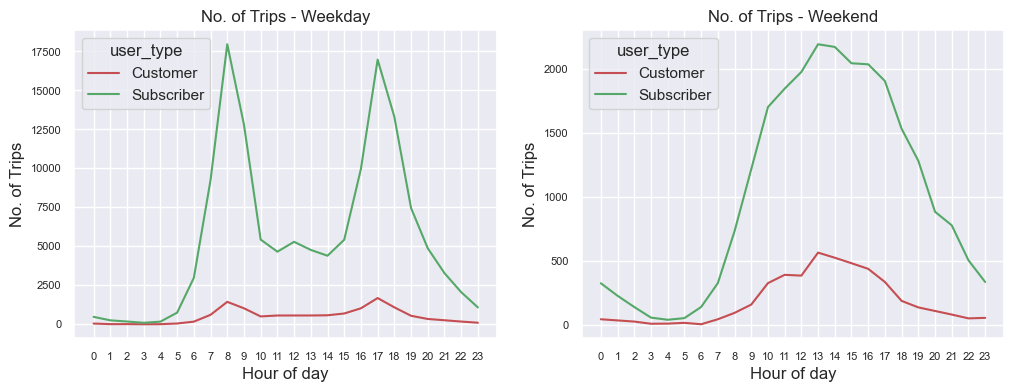

In [4]:
# Comparing trip volumes on hours of the day on weekdays and weekends
data_weekday = bike_data[bike_data['weekday_weekend']=='Weekday']
data_weekend =  bike_data[bike_data['weekday_weekend']=='Weekend']
plt.figure(figsize = [12, 4])
# PLOT ON LEFT
plt.subplot(1, 2, 1)
data = data_weekday.groupby(['hour', 'user_type'], as_index=False)['bike_id'].count()
sns.lineplot(data = data, x = 'hour', y='bike_id', hue = 'user_type', palette=['r', 'g'])
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.title('No. of Trips - Weekday')
plt.xlabel('Hour of day')
plt.ylabel('No. of Trips');
# PLOT ON RIGHT
plt.subplot(1, 2, 2)
data = data_weekend.groupby(['hour', 'user_type'], as_index=False)['bike_id'].count()
sns.lineplot(data = data, x = 'hour', y='bike_id', hue = 'user_type', palette=['r', 'g'])
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.title('No. of Trips - Weekend')
plt.xlabel('Hour of day')
plt.ylabel('No. of Trips');

## Average Trip Duration Throughout the Week
Trip durations are shorter on weekday than on weekends. From earlier investigation, we saw that trips on weekdays are mostly taken during typical work/school-home commute hours. On weekends, trips are longer showing usage could be for leisure purposes.

Having longer trips on weekends, it would be interesting to see how the average trip duration varies during the day, comparing commute hours to leisure hours.

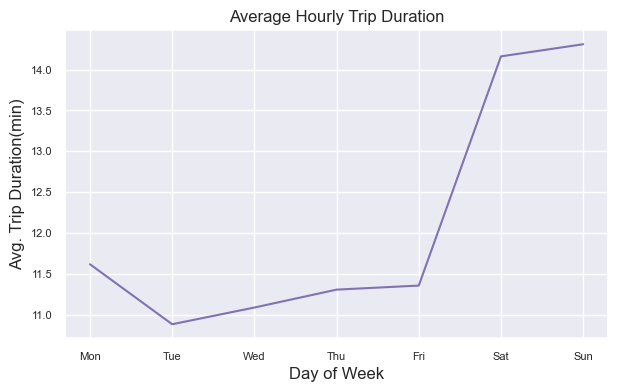

In [5]:
# Average trip duration throughout the week

data = bike_data.groupby(['day'], as_index=False)['duration_min'].mean()
sns.lineplot(data = data, x = 'day', y='duration_min', color = '#8172b3')
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.title('Average Hourly Trip Duration')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration(min)');

## Average Trip Duration Throughout the Day

There seems to be unexpected behaviour between *0200Hrs* and *0359Hrs* in the morning. The average trip duration is significantly higher than it is throughout the day. Typical leisure hours were seen to be between *1000Hrs* and *1859Hrs* on weekends but this exception calls for deeper investigation.

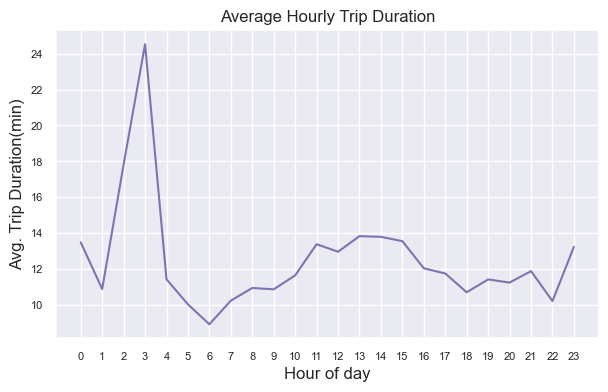

In [6]:
# Average hourly trip duration
data = bike_data.groupby(['hour'], as_index=False)['duration_min'].mean()
sns.lineplot(data = data, x = 'hour', y='duration_min', color = '#8172b3')
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.title('Average Hourly Trip Duration')
plt.xlabel('Hour of day')
plt.ylabel('Avg. Trip Duration(min)');

In [7]:
# Subsetting data to pick trips that took place between *0200Hrs* and *0359Hrs*
data_2am3am = bike_data[(bike_data['hour']=='2') | (bike_data['hour']=='3')]
data_2am3am.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,hour,day,weekday_weekend,member_age,duration_min
9382,114.0,Rhode Island St at 17th St,44.0,Civic Center/UN Plaza BART Station (Market St ...,5837,Subscriber,Male,Yes,3,Thu,Weekday,51,54.616667
9392,371.0,Lombard St at Columbus Ave,371.0,Lombard St at Columbus Ave,4924,Subscriber,Male,No,3,Thu,Weekday,33,86.800000
9395,178.0,Broadway at 30th St,182.0,19th Street BART Station,5603,Subscriber,Male,No,3,Thu,Weekday,63,6.450000
9396,364.0,China Basin St at 3rd St,81.0,Berry St at 4th St,5839,Subscriber,Male,No,3,Thu,Weekday,20,1.783333
9397,252.0,Channing Way at Shattuck Ave,252.0,Channing Way at Shattuck Ave,4419,Subscriber,Male,No,3,Thu,Weekday,36,9.350000


## User behavior Between *0200Hrs* and *0359Hrs*

The rides that are taking place between *0200Hrs* and *0359Hrs*, are primarily from subscribers on Friday, Saturday and Sunday, but both user types have a significant increase in usage within the 2 hours from Friday to Sunday.

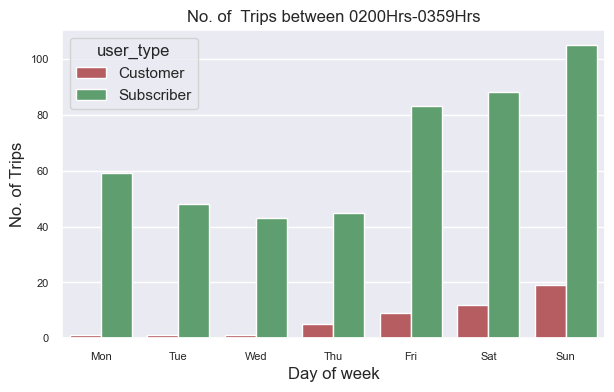

In [8]:
# See user behavior Between 2am - 3.59 am
data_2am3am = bike_data[(bike_data['hour']=='2') | (bike_data['hour']=='3')]

data = data_2am3am.groupby(['day', 'user_type'], as_index=False)['bike_id'].count()
sns.barplot(data=data, x='day', y='bike_id', hue='user_type', palette=['r', 'g'])
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.title('No. of  Trips between 0200Hrs-0359Hrs')
plt.xlabel('Day of week')
plt.ylabel('No. of Trips');

## Most Suitable Maintenance Window
With this interesting finding, if we were to plan for system maintenance, the best time based on user behavior would be around 0400Hrs 

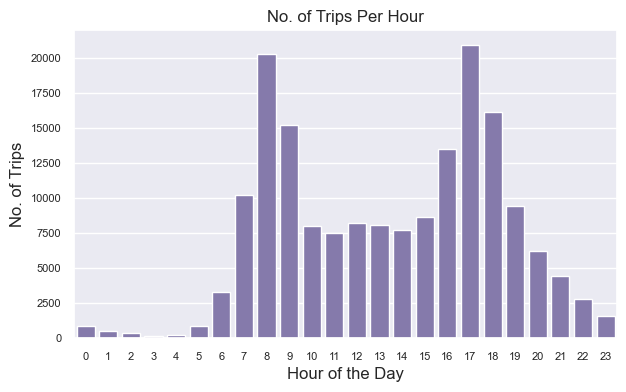

In [9]:
# Plot hour distribution
# Define base color
base_color = sns.color_palette()[4]
sns.countplot(data = bike_data, x = 'hour', color = base_color)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.title('No. of Trips Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('No. of Trips');

## User Behavior on Different Hours Across the Week
Subscribers primarily use the biking service on weekdays between 0700Hrs to 0959Hrs in the morning and between 1600 Hrs and 1859Hrs.  On weekends, heavier usage is seen between 1000Hrs to 1759Hrs. Customers on the other hand, are seen to have heavy usage in the same hours as subscribers on weekdays but tend to use the service more in between the commute hours to and from work. On weekends, they have are seen to use the service a lot between 1000Hrs and 1659Hrs. From user behaviour, demand is highest on Thursday at around 1700Hrs.

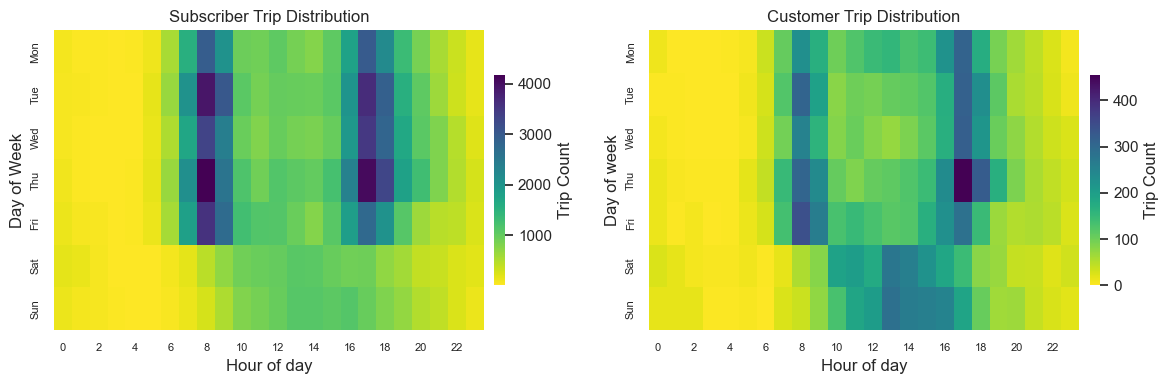

In [12]:
# Difference in user behaviour hourly throughout the week
plt.figure(figsize = [12, 4])
# PLOT ON LEFT
plt.subplot(1, 2, 1)
sub = bike_data[bike_data.user_type == 'Subscriber']
data_sub = sub.groupby(['day', 'hour'], as_index=False).size()
data_sub = data_sub.pivot(index='day', columns='hour', values='size')  # reshape data to heatmap format
sns.heatmap(data=data_sub, cmap='viridis_r', cbar_kws={'label':'Trip Count', 'shrink': 0.7, 'pad':0.02})
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.title('Subscriber Trip Distribution')
plt.xlabel('Hour of day')
plt.ylabel('Day of Week')
# PLOT ON RIGHT
plt.subplot(1, 2, 2)
cust = bike_data[bike_data.user_type == 'Customer']
data_cust = cust.groupby(['day', 'hour'], as_index=False).size()
data_cust = data_cust.pivot(index='day', columns='hour', values='size') # reshape data to heatmap format
sns.heatmap(data=data_cust, cmap='viridis_r', cbar_kws={'label':'Trip Count', 'shrink': 0.7, 'pad':0.02})
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.title('Customer Trip Distribution')
plt.xlabel('Hour of day')
plt.ylabel('Day of week')
plt.tight_layout()